In [632]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import math
import os
from scipy.stats.stats import pearsonr
%matplotlib inline
os.chdir('/Users/MCHARU/Desktop/capstone project')
sns.set(style='darkgrid')
sns.set_palette("cubehelix")

In [769]:
train=pd.read_excel('train.xlsx')

test=pd.read_excel('test.xlsx')

In [634]:
print('The number of rows is train is {} and no. of columns are {}'.format(train.shape[0],train.shape[1]))
print('The number of rows in test is  {} and no. of columns are {}'.format(test.shape[0],test.shape[1]))


The number of rows is train is 3998 and no. of columns are 38
The number of rows in test is  1500 and no. of columns are 38


In [635]:
#checking of null values
print(train.isnull().sum().sum())
print(test.isnull().sum().sum())



0
0


In [636]:
print('shape of train data',train.shape)
print('shape of train data',test.shape)

shape of train data (3998, 38)
shape of train data (1500, 38)


In [637]:
train.head()

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
train,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
train,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,cbse,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
train,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,cbse,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
train,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
train,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,cbse,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [986]:
test.head().T

,test,test,test,test,test
ID,664736,1123290,1062444,1072028,267259
Salary,?,?,?,?,?
DOJ,?,?,?,?,?
DOL,?,?,?,?,?
Designation,?,?,?,?,?
JobCity,?,?,?,?,?
Gender,m,m,f,f,m
DOB,1992-01-16 00:00:00,1992-06-05 00:00:00,1992-11-22 00:00:00,1990-10-17 00:00:00,1990-03-20 00:00:00
10percentage,75,83,85.2,81.8,78
10board,cbse,state board,cbse,state board,cbse


In [639]:
train.columns

Index(['ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity', 'Gender', 'DOB',
       '10percentage', '10board', '12graduation', '12percentage', '12board',
       'CollegeID', 'CollegeTier', 'Degree', 'Specialization', 'collegeGPA',
       'CollegeCityID', 'CollegeCityTier', 'CollegeState', 'GraduationYear',
       'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience'],
      dtype='object')

In [640]:
test.columns

Index(['ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity', 'Gender', 'DOB',
       '10percentage', '10board', '12graduation', '12percentage', '12board',
       'CollegeID', 'CollegeTier', 'Degree', 'Specialization', 'collegeGPA',
       'CollegeCityID', 'CollegeCityTier', 'CollegeState', 'GraduationYear',
       'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience'],
      dtype='object')

In [641]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3998 entries, train to train
Data columns (total 38 columns):
ID                       3998 non-null int64
Salary                   3998 non-null int64
DOJ                      3998 non-null datetime64[ns]
DOL                      3998 non-null object
Designation              3998 non-null object
JobCity                  3998 non-null object
Gender                   3998 non-null object
DOB                      3998 non-null datetime64[ns]
10percentage             3998 non-null float64
10board                  3998 non-null object
12graduation             3998 non-null int64
12percentage             3998 non-null float64
12board                  3998 non-null object
CollegeID                3998 non-null int64
CollegeTier              3998 non-null int64
Degree                   3998 non-null object
Specialization           3998 non-null object
collegeGPA               3998 non-null float64
CollegeCityID            3998 non-null int64
Colleg

In [642]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1500 entries, test to test
Data columns (total 38 columns):
ID                       1500 non-null int64
Salary                   1500 non-null object
DOJ                      1500 non-null object
DOL                      1500 non-null object
Designation              1500 non-null object
JobCity                  1500 non-null object
Gender                   1500 non-null object
DOB                      1500 non-null datetime64[ns]
10percentage             1500 non-null float64
10board                  1500 non-null object
12graduation             1500 non-null int64
12percentage             1500 non-null float64
12board                  1500 non-null object
CollegeID                1500 non-null int64
CollegeTier              1500 non-null int64
Degree                   1500 non-null object
Specialization           1500 non-null object
collegeGPA               1500 non-null float64
CollegeCityID            1500 non-null int64
CollegeCityTier

In [643]:
# drop id column from train and test
train.drop('ID',axis=1,inplace=True)
test.drop('ID',axis=1,inplace=True)


train.index=np.arange(0,len(train))
test.index=np.arange(0,len(test))

In [644]:
# for setting the index
print(train.index)
print(test.index)

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            3988, 3989, 3990, 3991, 3992, 3993, 3994, 3995, 3996, 3997],
           dtype='int64', length=3998)
Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            1490, 1491, 1492, 1493, 1494, 1495, 1496, 1497, 1498, 1499],
           dtype='int64', length=1500)


In [645]:
# extrating age feature out of DOB columns
from datetime import datetime
# using list comprehension
train['Age']=[ abs(2016-train.DOB[i].year) for i in range(0,len(train))]

train.drop('DOB',axis=1,inplace=True)

In [646]:
# extracting feature out date of leaving column
def xyz(x):
    if x=="present":
        return 'present'
    else:
        return 'left'

train['DOL']=train.DOL.apply(xyz)

In [647]:
# droping date of joining
train.drop('DOJ',axis=1,inplace=True)

In [648]:
# converting the feature which are  by default type casted as object into there respective data type

train['10percentage']=pd.to_numeric(train['10percentage'])


In [649]:
train['10percentage'].dtype

dtype('float64')

In [650]:
train.Designation.value_counts()[train.Designation.value_counts()>10]

software engineer                    539
software developer                   265
system engineer                      205
programmer analyst                   139
systems engineer                     118
java software engineer               111
software test engineer               100
project engineer                      77
technical support engineer            76
senior software engineer              72
java developer                        67
test engineer                         57
web developer                         54
assistant manager                     52
application developer                 52
network engineer                      51
business analyst                      49
data analyst                          49
engineer                              47
android developer                     46
associate software engineer           46
programmer                            36
senior systems engineer               35
.net developer                        34
php developer   

In [651]:
# droping all id columns and unwnated columns
train.drop(['CollegeID','CollegeCityID'],axis=1,inplace=True)

In [652]:
train['12graduation']=train['12graduation'].astype(str)
train['CollegeTier']=train['CollegeTier'].astype(str)
train['CollegeCityTier']=train['CollegeCityTier'].astype(str)
train['GraduationYear']=train['GraduationYear'].astype(str)

In [653]:
# for finding categorical values
for i in train.columns:
    if np.dtype(train[i]).name!="object":
        print(i)

Salary
10percentage
12percentage
collegeGPA
English
Logical
Quant
Domain
ComputerProgramming
ElectronicsAndSemicon
ComputerScience
MechanicalEngg
ElectricalEngg
TelecomEngg
CivilEngg
conscientiousness
agreeableness
extraversion
nueroticism
openess_to_experience
Age


In [654]:
# checking the unique values of train
for i in train.columns:
    if np.dtype(train[i]).name=='object':
        print('The name of the column {}'.format(i),'\n',train[i].unique())

The name of the column DOL 
 ['present' 'left']
The name of the column Designation 
 ['senior quality engineer' 'assistant manager' 'systems engineer'
 'senior software engineer' 'get' 'system engineer'
 'java software engineer' 'mechanical engineer' 'electrical engineer'
 'project engineer' 'senior php developer' 'senior systems engineer'
 'quality assurance engineer' 'qa analyst' 'network engineer'
 'product development engineer' 'associate software developer'
 'data entry operator' 'software engineer' 'developer'
 'electrical project engineer' 'programmer analyst' 'systems analyst'
 'ase' 'telecommunication engineer' 'application developer'
 'ios developer' 'executive assistant' 'online marketing manager'
 'documentation specialist' 'associate software engineer'
 'management trainee' 'site manager' 'software developer' '.net developer'
 'production engineer' 'jr. software engineer'
 'trainee software developer' 'ui developer' 'assistant system engineer'
 'android developer' 'custome

In [655]:
# feature extraction from columns which contains minus -1
zippped_columns=zip(train.ComputerProgramming,train.ElectronicsAndSemicon,train.ComputerScience,train.MechanicalEngg,train.ElectricalEngg,train.TelecomEngg,train.CivilEngg)
new_column=[]

for i,j,k,l,m,n,o in zippped_columns:
    test=[]
    li=[i,j,k,l,m,n,o]
    
    if li[0]!=-1:
        test.append('CP')
    elif li[1]!=-1:
        test.append('EAS')
    elif li[2]!=-1:
        test.append('CS')
    elif li[3]!=-1:
        test.append('ME')
    elif li[4]!=-1:
        test.append('EE')
    elif li[5]!=-1:
        test.append('TE')
    elif li[6]!=-1:
        test.append('CE')
    else:
        test.append('null')

    new_column.append(test)
    

# for removing tranforming from list to str format
b=[]
for i in range(0,len(new_column)):
    b.append(new_column[i][0])

    
train["Stream"]=b

In [656]:
#after extrating the feature droping the columns
train.drop(['ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg'],axis=1,inplace=True)

In [657]:
train.columns

Index(['Salary', 'DOL', 'Designation', 'JobCity', 'Gender', '10percentage',
       '10board', '12graduation', '12percentage', '12board', 'CollegeTier',
       'Degree', 'Specialization', 'collegeGPA', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience', 'Age', 'Stream'],
      dtype='object')

In [658]:
train['12board'].value_counts()

cbse                                                                        1400
state board                                                                 1254
0                                                                            359
icse                                                                         129
up board                                                                      87
isc                                                                           45
board of intermediate                                                         36
board of intermediate education                                               31
up                                                                            20
rbse                                                                          19
mp board                                                                      17
bie                                                                           15
ipe                         

In [659]:
# transfoming 12 board
def impute(x):
    if x=='cbse':
        return 'cbse'
    elif x=='state board':
        return 'state board'
    else:
        return 'others'
train['12board']=train['12board'].apply(impute)

In [660]:
train.Designation.value_counts()

software engineer                      539
software developer                     265
system engineer                        205
programmer analyst                     139
systems engineer                       118
java software engineer                 111
software test engineer                 100
project engineer                        77
technical support engineer              76
senior software engineer                72
java developer                          67
test engineer                           57
web developer                           54
assistant manager                       52
application developer                   52
network engineer                        51
business analyst                        49
data analyst                            49
engineer                                47
android developer                       46
associate software engineer             46
programmer                              36
senior systems engineer                 35
.net develo

In [661]:
import re

a=[]
for i in range(0,len(train)):
        if len(re.findall(r'engineer',train.Designation[i]))!=0:
            a.append('engineer')
        elif (len(re.findall(r'developer',train.Designation[i]))!=0)|(len(re.findall(r'programmer',train.Designation[i]))!=0):
            a.append('developer')
        elif len(re.findall(r'analyst',train.Designation[i]))!=0:
            a.append('analyst')
        elif len(re.findall(r'manager',train.Designation[i]))!=0:
            a.append('manager')
        else:
            a.append('others')
        

train['Designation']=a

In [662]:
train.head()

,Salary,DOL,Designation,JobCity,Gender,10percentage,10board,12graduation,12percentage,12board,...,Logical,Quant,Domain,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Age,Stream
0,420000,present,engineer,Bangalore,f,84.3,"board ofsecondary education,ap",2007,95.8,others,...,585,525,0.635979,0.9737,0.8128,0.5269,1.35490,-0.4455,26,CP
1,500000,present,manager,Indore,m,85.4,cbse,2007,85.0,cbse,...,610,780,0.960603,-0.7335,0.3789,1.2396,-0.10760,0.8637,27,EAS
2,325000,present,engineer,Chennai,f,85.0,cbse,2010,68.2,cbse,...,545,370,0.450877,0.2718,1.7109,0.1637,-0.86820,0.6721,24,CP
3,1100000,present,engineer,Gurgaon,m,85.6,cbse,2007,83.6,cbse,...,585,625,0.974396,0.0464,0.3448,-0.3440,-0.40780,-0.9194,27,CP
4,200000,left,others,Manesar,m,78.0,cbse,2008,76.8,cbse,...,625,465,0.124502,-0.8810,-0.2793,-1.0697,0.09163,-0.1295,25,EAS


In [663]:
train.Designation.value_counts()

engineer     2137
developer     897
others        573
analyst       267
manager       124
Name: Designation, dtype: int64

In [664]:
for i in train.columns:
    print(train[i].unique())

[ 420000  500000  325000 1100000  200000  300000  400000  600000  230000
  450000  270000  350000  250000  120000  320000  190000  180000  335000
  435000  345000  145000  220000  530000  340000  360000  215000   80000
  330000  380000  110000  205000   95000  390000   60000  240000  525000
  305000  150000  310000  455000  800000  100000  280000  445000  315000
  370000  275000 1500000  425000  470000  460000  510000  480000  170000
  640000  225000  440000 1200000  675000  105000  195000  385000  235000
  615000  290000  140000  405000 1860000  375000  430000  660000   70000
  410000  550000   35000  115000  415000  265000  285000  245000  395000
  560000  700000  185000  160000  625000   85000  135000  785000  210000
  155000  355000  535000  690000  260000 1110000 1000000  505000  475000
  715000  820000   90000  720000 2600000  515000   55000  495000   65000
  655000  545000  520000  645000 1025000  775000  490000 1300000 3500000
  910000  570000  255000  130000  175000  730000  5

In [665]:
train.Salary.skew()

6.451081166224832

In [666]:
train.head()

,Salary,DOL,Designation,JobCity,Gender,10percentage,10board,12graduation,12percentage,12board,...,Logical,Quant,Domain,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Age,Stream
0,420000,present,engineer,Bangalore,f,84.3,"board ofsecondary education,ap",2007,95.8,others,...,585,525,0.635979,0.9737,0.8128,0.5269,1.35490,-0.4455,26,CP
1,500000,present,manager,Indore,m,85.4,cbse,2007,85.0,cbse,...,610,780,0.960603,-0.7335,0.3789,1.2396,-0.10760,0.8637,27,EAS
2,325000,present,engineer,Chennai,f,85.0,cbse,2010,68.2,cbse,...,545,370,0.450877,0.2718,1.7109,0.1637,-0.86820,0.6721,24,CP
3,1100000,present,engineer,Gurgaon,m,85.6,cbse,2007,83.6,cbse,...,585,625,0.974396,0.0464,0.3448,-0.3440,-0.40780,-0.9194,27,CP
4,200000,left,others,Manesar,m,78.0,cbse,2008,76.8,cbse,...,625,465,0.124502,-0.8810,-0.2793,-1.0697,0.09163,-0.1295,25,EAS


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


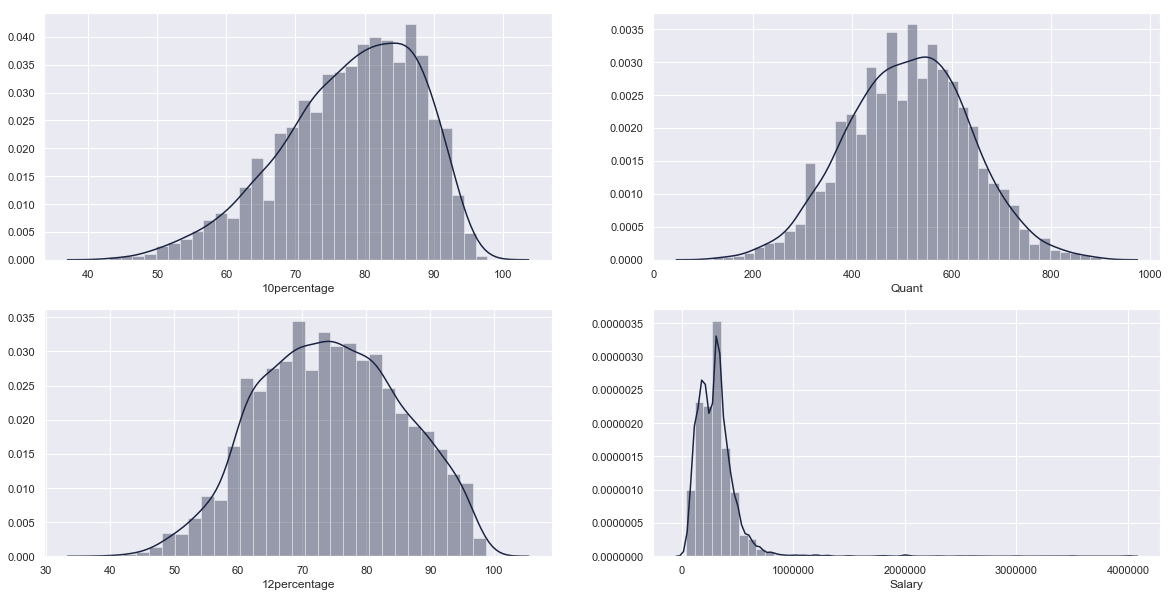

In [667]:
fig,axes=plt.subplots(2,2,figsize=(20,10))
plt.subplots_adjust()
sns.distplot(train['10percentage'],ax=axes[0,0])
sns.distplot(train['Quant'],ax=axes[0,1])
sns.distplot(train['12percentage'],ax=axes[1,0])
sns.distplot(train['Salary'],ax=axes[1,1],label=train.Salary.skew())



# Creating a new dataframe of continuous variable

In [668]:
li=[]
for i in train.columns:
    if (np.dtype(train[i]).name=='float64')|(np.dtype(train[i]).name=='int64'):
        li.append(i)

In [669]:
cont_train=train[li]

In [670]:
cont_train.head()

,Salary,10percentage,12percentage,collegeGPA,English,Logical,Quant,Domain,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Age
0,420000,84.3,95.8,78.00,515,585,525,0.635979,0.9737,0.8128,0.5269,1.35490,-0.4455,26
1,500000,85.4,85.0,70.06,695,610,780,0.960603,-0.7335,0.3789,1.2396,-0.10760,0.8637,27
2,325000,85.0,68.2,70.00,615,545,370,0.450877,0.2718,1.7109,0.1637,-0.86820,0.6721,24
3,1100000,85.6,83.6,74.64,635,585,625,0.974396,0.0464,0.3448,-0.3440,-0.40780,-0.9194,27
4,200000,78.0,76.8,73.90,545,625,465,0.124502,-0.8810,-0.2793,-1.0697,0.09163,-0.1295,25


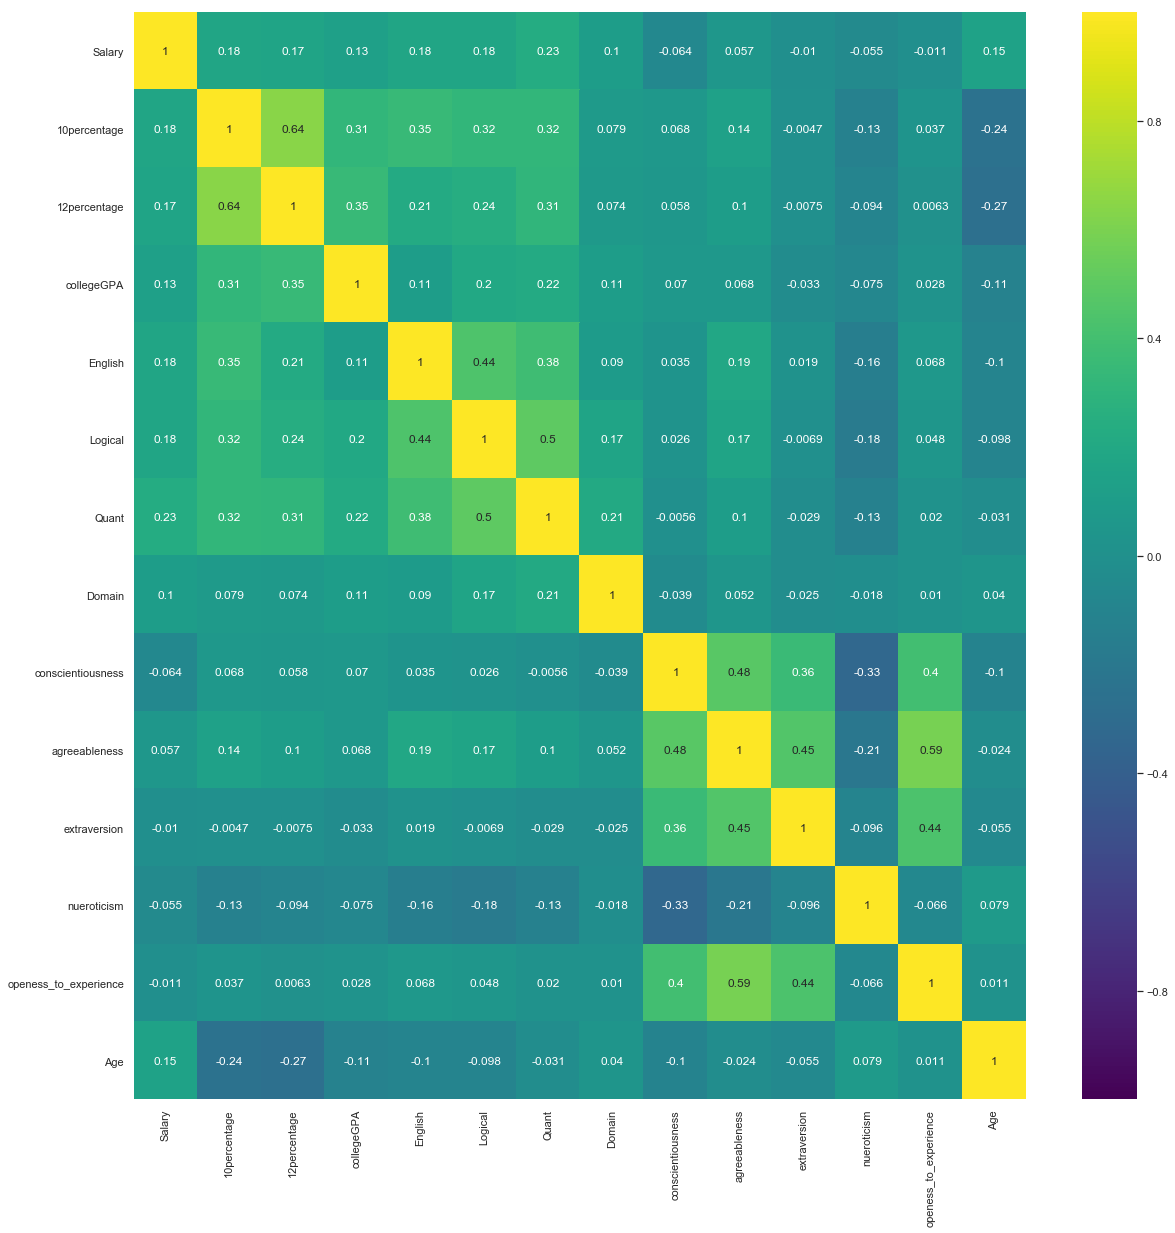

In [671]:
plt.figure(figsize=(20,20))
sns.heatmap(cont_train.corr(),annot=True,vmin=-1 ,vmax=1,cmap='viridis')


<Figure size 720x720 with 0 Axes>

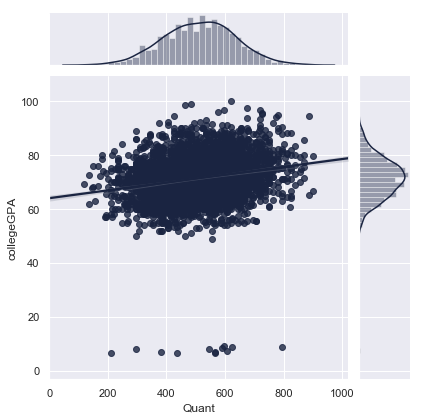

In [672]:
# there some outlier like students have high college gpa have scored very less in quant
plt.figure(figsize=(10,10))
sns.jointplot(x='Quant',y='collegeGPA',data=cont_train,kind='reg')

The correlation between the salary and 10percentage is: 0.643377796023405
The significance of the correlation value is          : 0.0


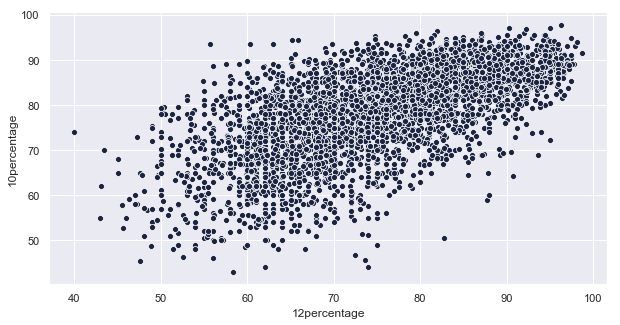

In [673]:
plt.figure(figsize=(10,5))
sns.scatterplot(y=cont_train["10percentage"],x=cont_train['12percentage'])


print('The correlation between the salary and 10percentage is: {}'.format(pearsonr(cont_train['10percentage'],cont_train['12percentage'])[0]))
print('The significance of the correlation value is          : {}'.format(pearsonr(cont_train['10percentage'],cont_train['12percentage'])[1]))

In [674]:
cont_train.columns

Index(['Salary', '10percentage', '12percentage', 'collegeGPA', 'English',
       'Logical', 'Quant', 'Domain', 'conscientiousness', 'agreeableness',
       'extraversion', 'nueroticism', 'openess_to_experience', 'Age'],
      dtype='object')

The correlation between the salary and 10percentage is: 0.17737277344849328
The significance of the correlation value is          : 1.2907220183456188e-29


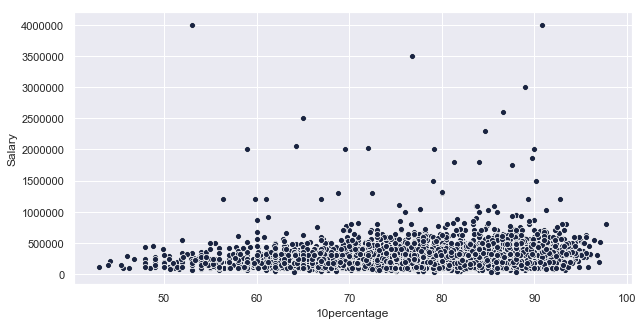

In [675]:
# analysis of realtion ship between the salary and 10th percentage
plt.figure(figsize=(10,5))
sns.scatterplot(y=cont_train['Salary'],x=cont_train['10percentage'])

print('The correlation between the salary and 10percentage is: {}'.format(pearsonr(cont_train['Salary'],cont_train['10percentage'])[0]))
print('The significance of the correlation value is          : {}'.format(pearsonr(cont_train['Salary'],cont_train['10percentage'])[1]))




The correlation between the salary and 12percentage is: 0.170254477902461
The significance of the correlation value is          : 2.200104508496844e-27


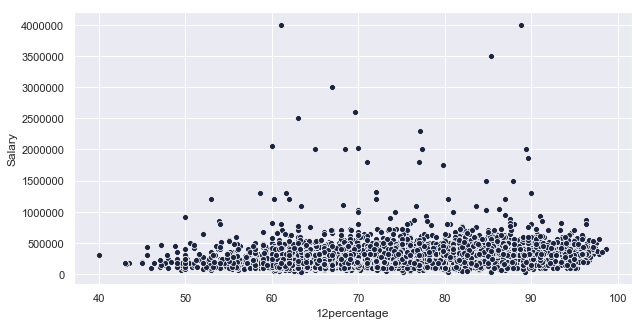

In [676]:
# analysis of realtion ship between the salary and 12th percentage

plt.figure(figsize=(10,5))
sns.scatterplot(y=cont_train['Salary'],x=cont_train['12percentage'])

print('The correlation between the salary and 12percentage is: {}'.format(pearsonr(cont_train['Salary'],cont_train['12percentage'])[0]))
print('The significance of the correlation value is          : {}'.format(pearsonr(cont_train['Salary'],cont_train['12percentage'])[1]))




The correlation between the salary and 12percentage is: 0.1792749664830867
The significance of the correlation value is          : 3.1496535154836043e-30


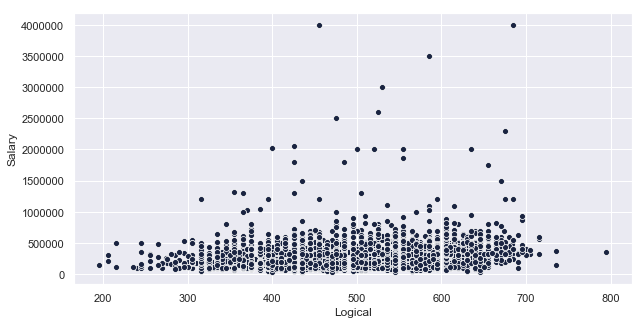

In [677]:
# corraltion between the salary and the logaical marks 

plt.figure(figsize=(10,5))
sns.scatterplot(y=cont_train['Salary'],x=cont_train['Logical'])

print('The correlation between the salary and 12percentage is: {}'.format(pearsonr(cont_train['Salary'],cont_train['Logical'])[0]))
print('The significance of the correlation value is          : {}'.format(pearsonr(cont_train['Salary'],cont_train['Logical'])[1]))



In [678]:
# create a new data frame for continuous varible
cont_train=train[li]

In [679]:
cont_train.head()

,Salary,10percentage,12percentage,collegeGPA,English,Logical,Quant,Domain,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Age
0,420000,84.3,95.8,78.00,515,585,525,0.635979,0.9737,0.8128,0.5269,1.35490,-0.4455,26
1,500000,85.4,85.0,70.06,695,610,780,0.960603,-0.7335,0.3789,1.2396,-0.10760,0.8637,27
2,325000,85.0,68.2,70.00,615,545,370,0.450877,0.2718,1.7109,0.1637,-0.86820,0.6721,24
3,1100000,85.6,83.6,74.64,635,585,625,0.974396,0.0464,0.3448,-0.3440,-0.40780,-0.9194,27
4,200000,78.0,76.8,73.90,545,625,465,0.124502,-0.8810,-0.2793,-1.0697,0.09163,-0.1295,25


In [680]:
cont_train.columns

Index(['Salary', '10percentage', '12percentage', 'collegeGPA', 'English',
       'Logical', 'Quant', 'Domain', 'conscientiousness', 'agreeableness',
       'extraversion', 'nueroticism', 'openess_to_experience', 'Age'],
      dtype='object')

In [681]:
cont_train.head()

,Salary,10percentage,12percentage,collegeGPA,English,Logical,Quant,Domain,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Age
0,420000,84.3,95.8,78.00,515,585,525,0.635979,0.9737,0.8128,0.5269,1.35490,-0.4455,26
1,500000,85.4,85.0,70.06,695,610,780,0.960603,-0.7335,0.3789,1.2396,-0.10760,0.8637,27
2,325000,85.0,68.2,70.00,615,545,370,0.450877,0.2718,1.7109,0.1637,-0.86820,0.6721,24
3,1100000,85.6,83.6,74.64,635,585,625,0.974396,0.0464,0.3448,-0.3440,-0.40780,-0.9194,27
4,200000,78.0,76.8,73.90,545,625,465,0.124502,-0.8810,-0.2793,-1.0697,0.09163,-0.1295,25


# performing anova in the continuous data set:



In [682]:
import  statsmodels.api as sm
from   statsmodels.formula.api import  ols
from statsmodels.stats.anova import  anova_lm
model=ols('Salary~Gender',data=train).fit()
anova_table=anova_lm(model,typ=2)
print(anova_table)


                sum_sq      df         F    PR(>F)
Gender    2.049335e+11     1.0  4.532194  0.033324
Residual  1.806883e+14  3996.0       NaN       NaN


In [683]:
train.columns

Index(['Salary', 'DOL', 'Designation', 'JobCity', 'Gender', '10percentage',
       '10board', '12graduation', '12percentage', '12board', 'CollegeTier',
       'Degree', 'Specialization', 'collegeGPA', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience', 'Age', 'Stream'],
      dtype='object')

# Applying PCA to find out the principle components

In [684]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaled_cont=pd.DataFrame(sc.fit_transform(cont_train),columns=cont_train.columns)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [685]:
# appling pca
from sklearn.decomposition import PCA
pc=PCA()
pc.fit_transform(scaled_cont.drop('Salary',axis=1))

array([[-1.68014708,  0.29176607, -0.57503775, ..., -1.42916105,
        -0.59271908,  0.74518577],
       [-2.68442344,  0.53202092,  2.05534824, ...,  0.66371808,
         0.5223409 ,  0.44358228],
       [-1.2414245 , -1.3239524 , -0.20556975, ..., -0.40107072,
        -0.39615865, -0.63439616],
       ...,
       [ 1.47694228,  1.92825443, -0.20452714, ...,  0.57885117,
         0.8688861 , -0.59865947],
       [ 1.09119745, -0.3364207 , -1.10098319, ...,  0.06172526,
         0.06658282, -0.2951966 ],
       [ 1.31645664,  0.98991261,  0.5841526 , ..., -0.14107886,
        -0.2427254 ,  0.21916694]])

In [686]:
sum(pc.explained_variance_ratio_.cumsum()<=0.95)

11

In [687]:
len(pc.explained_variance_ratio_.cumsum()<=0.95)

13

In [688]:
len(pc.explained_variance_ratio_)

13

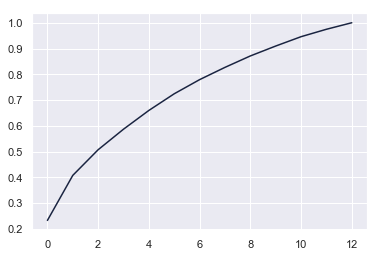

In [689]:
plt.plot(pc.explained_variance_ratio_.cumsum())


In [690]:
x_labels=['pc'+ str(i) for i in range(1,14)]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

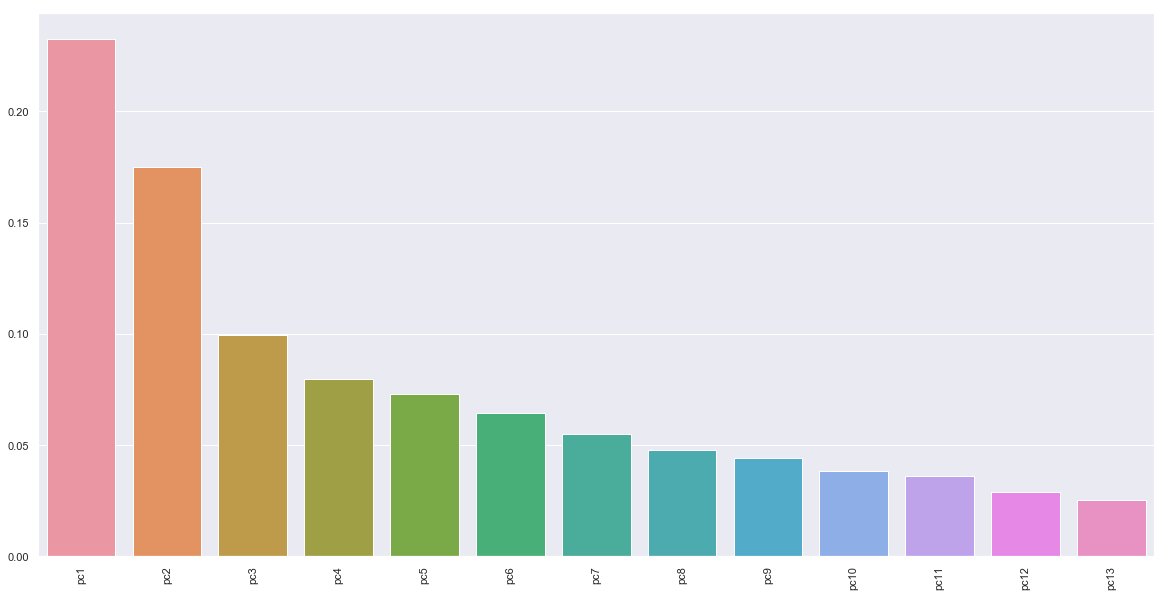

In [691]:
plt.figure(figsize=(20,10))
sns.barplot(y=pc.explained_variance_ratio_,x=x_labels)
plt.xticks(rotation=90)

In [692]:
pc=PCA(n_components=11)
pc_dataframe=pd.DataFrame(pc.fit_transform(scaled_cont.drop('Salary',axis=1)),columns=['pc'+ str(i) for i in range(1,12)])

In [693]:
pc_dataframe.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11
0,-1.680147,0.291766,-0.575038,-1.542980,0.375436,0.410873,0.155912,0.249876,0.204422,-1.020973,-1.429161
1,-2.684423,0.532021,2.055348,-0.738609,1.117403,0.048655,0.596914,0.847520,-0.716495,-0.025408,0.663718
2,-1.241424,-1.323952,-0.205570,0.720762,0.604512,-0.549106,0.011328,-1.567987,-0.290671,0.833283,-0.401071
3,-1.662397,1.382038,1.122949,-0.038322,-0.357275,0.284256,0.634457,-0.251801,-0.304870,-0.571107,-0.356501
4,-0.055974,1.304224,-0.053800,0.477094,0.799655,0.458205,-0.765255,-0.601323,0.424582,0.923944,-0.726561


# Inference Drawn After Apllying PCA

* There are 17 pricinple components that expalains the maximum variance
* Total number feature used in pca are 21 
* all the feature were continuous varible
* The salary feature was dropped as it is the target variable

# Using Decision Tree To Find the feature importance :

In [694]:
from sklearn.ensemble import RandomForestRegressor
rf_tree=RandomForestRegressor(max_depth=10)

In [695]:
pred=rf_tree.fit(scaled_cont.drop('Salary',axis=1),cont_train.Salary).predict(scaled_cont.drop('Salary',axis=1))

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [696]:
pred

array([391800.90608486, 476119.0105055 , 239702.40110413, ...,
       276299.91042583, 197750.70722715, 292630.32150368])

In [697]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(cont_train.Salary,pred))

120862.15372876551

In [698]:
from sklearn.tree import DecisionTreeRegressor
dtree=DecisionTreeRegressor()
pred_dtree=dtree.fit(scaled_cont.drop('Salary',axis=1),cont_train.Salary).predict(scaled_cont.drop('Salary',axis=1))

In [699]:
print(cont_train.Salary.head())

0     420000
1     500000
2     325000
3    1100000
4     200000
Name: Salary, dtype: int64


In [700]:
pred[0:5]

array([391800.90608486, 476119.0105055 , 239702.40110413, 688872.66710328,
       241240.05912617])

In [701]:
len(rf_tree.feature_importances_)

13

In [702]:
len(scaled_cont.drop('Salary',axis=1).columns)

13

In [703]:
df_importance=pd.DataFrame({
             'Feature_name':scaled_cont.drop('Salary',axis=1).columns,
             'Feature_importance':rf_tree.feature_importances_})

In [704]:
df_importance=df_importance.sort_values(by='Feature_importance',ascending=False).reset_index().drop('index',axis=1)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

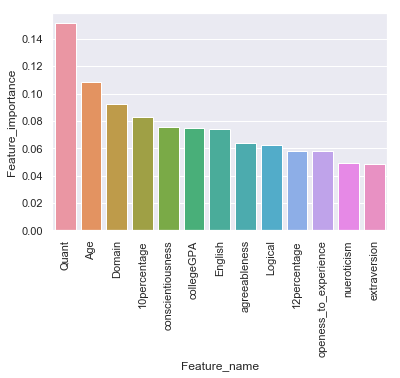

In [705]:


plt.Figure(figsize=(10,10))
sns.barplot(x=df_importance.Feature_name,y=df_importance.Feature_importance)
plt.xticks(rotation=90)



# Inference Drawn from random forest
Top feature are 
* quant
* 10 percentage
* logical
* conscientiousess
* 12 graduation
* 12 percentage
* college gpa
most important feature is quant

## Finding Variable Inflation Factor

In [706]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [707]:
from sklearn.metrics import r2_score

In [708]:
lr_pred=lr.fit(scaled_cont.drop('Salary',axis=1),train.Salary).predict(scaled_cont.drop('Salary',axis=1))

In [709]:
np.sqrt(mean_squared_error(train.Salary,lr_pred))

198605.58937136002

In [710]:
a_=[]
b_=[]
for i in cont_train.columns[1:]:
    y=cont_train.loc[:,cont_train.columns==i]
    x=cont_train.loc[:,cont_train.columns!=i]
    #lr_pred=lr.fit(scaled_cont.drop(i,axis=1),train[i]).predict(scaled_cont.drop(i,axis=1))
    model=lr.fit(x,y)
    a=lr.score(x,y)
    a_.append(a)
    #a=r2_score(train.Salary,lr_pred)
    vif=1/(1-(a)**2)
    b_.append(vif)
print(pd.DataFrame({'r2 score':a_,
             'vif':b_}))

    r2 score       vif
0   0.481981  1.302602
1   0.465478  1.276601
2   0.159579  1.026131
3   0.290154  1.091929
4   0.355587  1.144744
5   0.340744  1.131358
6   0.060759  1.003705
7   0.347949  1.137745
8   0.488238  1.312984
9   0.277106  1.083174
10  0.158723  1.025844
11  0.404920  1.196115
12  0.145126  1.021515


In [711]:
cont_train.columns[1:]

Index(['10percentage', '12percentage', 'collegeGPA', 'English', 'Logical',
       'Quant', 'Domain', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience', 'Age'],
      dtype='object')

## Creating a Dataframe of Categorical Variable

In [712]:
lb=[]
for i in train.columns:
    if np.dtype(train[i]).name=='object':
        lb.append(i)
    

In [713]:
lb

['DOL',
 'Designation',
 'JobCity',
 'Gender',
 '10board',
 '12graduation',
 '12board',
 'CollegeTier',
 'Degree',
 'Specialization',
 'CollegeCityTier',
 'CollegeState',
 'GraduationYear',
 'Stream']

In [714]:
cat_train=train[lb]

In [715]:
cat_train.head()

,DOL,Designation,JobCity,Gender,10board,12graduation,12board,CollegeTier,Degree,Specialization,CollegeCityTier,CollegeState,GraduationYear,Stream
0,present,engineer,Bangalore,f,"board ofsecondary education,ap",2007,others,2,B.Tech/B.E.,computer engineering,0,Andhra Pradesh,2011,CP
1,present,manager,Indore,m,cbse,2007,cbse,2,B.Tech/B.E.,electronics and communication engineering,0,Madhya Pradesh,2012,EAS
2,present,engineer,Chennai,f,cbse,2010,cbse,2,B.Tech/B.E.,information technology,0,Uttar Pradesh,2014,CP
3,present,engineer,Gurgaon,m,cbse,2007,cbse,1,B.Tech/B.E.,computer engineering,1,Delhi,2011,CP
4,left,others,Manesar,m,cbse,2008,cbse,2,B.Tech/B.E.,electronics and communication engineering,0,Uttar Pradesh,2012,EAS


In [716]:
cat_train.Designation.value_counts().head()

engineer     2137
developer     897
others        573
analyst       267
manager       124
Name: Designation, dtype: int64

In [717]:
cat_train.head()


,DOL,Designation,JobCity,Gender,10board,12graduation,12board,CollegeTier,Degree,Specialization,CollegeCityTier,CollegeState,GraduationYear,Stream
0,present,engineer,Bangalore,f,"board ofsecondary education,ap",2007,others,2,B.Tech/B.E.,computer engineering,0,Andhra Pradesh,2011,CP
1,present,manager,Indore,m,cbse,2007,cbse,2,B.Tech/B.E.,electronics and communication engineering,0,Madhya Pradesh,2012,EAS
2,present,engineer,Chennai,f,cbse,2010,cbse,2,B.Tech/B.E.,information technology,0,Uttar Pradesh,2014,CP
3,present,engineer,Gurgaon,m,cbse,2007,cbse,1,B.Tech/B.E.,computer engineering,1,Delhi,2011,CP
4,left,others,Manesar,m,cbse,2008,cbse,2,B.Tech/B.E.,electronics and communication engineering,0,Uttar Pradesh,2012,EAS


In [718]:
cat_train.drop(['12graduation','GraduationYear'],axis=1,inplace=True)

/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [719]:
# job city columns
cat_train.JobCity.value_counts()

def impute(x):
    if x=='Bangalore':
        return 'Bangalore'
    elif x=='-1':
        return 'null'
    elif x=='Noida':
        return 'Noida'
    elif x=='Hyderabad':
        return 'Hyderabad'
    elif x=='Pune':
        return 'Pune'
    elif x=='Chennai':
        return 'Chennai'
    elif x=='Gurgaon':
        return 'Gurgaon'
    elif x=='New Delhi':
        return 'New Delhi'
    elif x=='Mumbai':
        return 'Mumbai'
    elif x=='Kolkata':
        return 'Kolkata'
    else:
        return 'other states'
cat_train['JobCity']=cat_train.JobCity.apply(impute)    
    
    
    

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [720]:
# for specializtion columns
cat_train.Specialization.value_counts()
def impute(x):
    if x=='electronics and communication engineering':
        return 'electronics and communication engineering'
    elif x=='computer science & engineering':
        return 'computer science & engineering'
    elif x=='information technology':
        return 'information technology'
    elif x=='computer engineering':
        return 'computer engineering'
    elif x=='computer application':
        return 'computer application'
    elif x=='mechanical engineering':
        return 'mechanical engineering'
    elif x=='electronics and electrical engineering':
        return 'electronics and electrical engineering'
    elif x=='electronics & telecommunications':
        return 'electronics & telecommunications'
    elif x=='electronics & telecommunications':
        return 'electronics & telecommunications'
    elif x=='electrical engineering':
        return 'electrical engineering'
    else:
        return 'other qalifications'
cat_train['Specialization']=cat_train.Specialization.apply(impute)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [721]:
cat_train.Specialization.value_counts()

electronics and communication engineering    880
computer science & engineering               744
information technology                       660
computer engineering                         600
other qalifications                          270
computer application                         244
mechanical engineering                       201
electronics and electrical engineering       196
electronics & telecommunications             121
electrical engineering                        82
Name: Specialization, dtype: int64

In [722]:
# transfoming 12 board
def impute(x):
    if x=='cbse':
        return 'cbse'
    elif x=='state board':
        return 'state board'
    else:
        return 'others'
cat_train['10board']=cat_train['10board'].apply(impute)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [723]:
# feature engineering for college states:
def states(x):
    if x in ['Kerala','Tamil Nadu','Karnataka','Andhra Pradesh','Telangana']:
        return 'south_indian_states'
    
    
    elif x in ['Himachal Pradesh','Uttarakhand','Jammu and Kashmir','Delhi','Uttar Pradesh','Haryana','Punjab','Uttarakhand']:
        return'north_indian_states'
    
    
    elif x in ['Goa','Rajasthan','Maharashtra','Gujarat']:
        return 'west_indian_states'
    
    
    elif x in ['Jharkhand','Bihar','West Bengal','Orissa']:
        return 'east_indian states'
    
    
    elif x in ['Madhya Pradesh','Chhattisgarh']:
        return 'central_india'
    elif x in['Assam','Sikkim','Meghalaya']:
        return 'north_est_india'
    else:
        return 'union_territory'
cat_train['CollegeState']=cat_train["CollegeState"].apply(states)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [724]:
for i in cat_train.columns:
    print(i,cat_train[i].unique())

DOL ['present' 'left']
Designation ['engineer' 'manager' 'others' 'developer' 'analyst']
JobCity ['Bangalore' 'other states' 'Chennai' 'Gurgaon' 'Hyderabad' 'Noida'
 'Kolkata' 'Pune' 'Mumbai' 'New Delhi']
Gender ['f' 'm']
10board ['others' 'cbse' 'state board']
12board ['others' 'cbse' 'state board']
CollegeTier ['2' '1']
Degree ['B.Tech/B.E.' 'MCA' 'M.Tech./M.E.' 'M.Sc. (Tech.)']
Specialization ['computer engineering' 'electronics and communication engineering'
 'information technology' 'computer science & engineering'
 'mechanical engineering' 'electronics and electrical engineering'
 'electronics & telecommunications' 'other qalifications'
 'computer application' 'electrical engineering']
CollegeCityTier ['0' '1']
CollegeState ['south_indian_states' 'central_india' 'north_indian_states'
 'east_indian states' 'west_indian_states' 'north_est_india'
 'union_territory']
Stream ['CP' 'EAS' 'ME' 'null' 'EE' 'TE' 'CE' 'CS']


In [725]:
train.GraduationYear.replace(to_replace='0',value=2016,inplace=True)
table1=pd.crosstab(train.GraduationYear,train.Degree)


In [726]:
train.GraduationYear.replace(to_replace='0',value=2016,inplace=True)

In [792]:
cont_train.Age.value_counts()

25    979
24    855
26    774
27    522
28    308
23    299
29    116
30     62
22     31
31     28
32     13
33      4
21      2
34      2
19      1
35      1
39      1
Name: Age, dtype: int64

In [793]:
cont_train.head()
def age_bin(x):
    if x <=24:
        return 'bin 1'
    elif x>24 and x<30:
        return 'bin 2'
    elif x>30:
        return 'bin 3'
cat_train["age_bin"]=cont_train['Age'].apply(age_bin)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [727]:
table1

Degree,B.Tech/B.E.,M.Sc. (Tech.),M.Tech./M.E.,MCA
GraduationYear,,,,
2016,1,0,0,0
2007,1,0,0,0
2009,20,0,0,4
2010,273,0,0,19
2011,459,0,2,46
2012,795,0,9,43
2013,1105,1,15,60
2014,961,0,18,57
2015,70,1,9,14


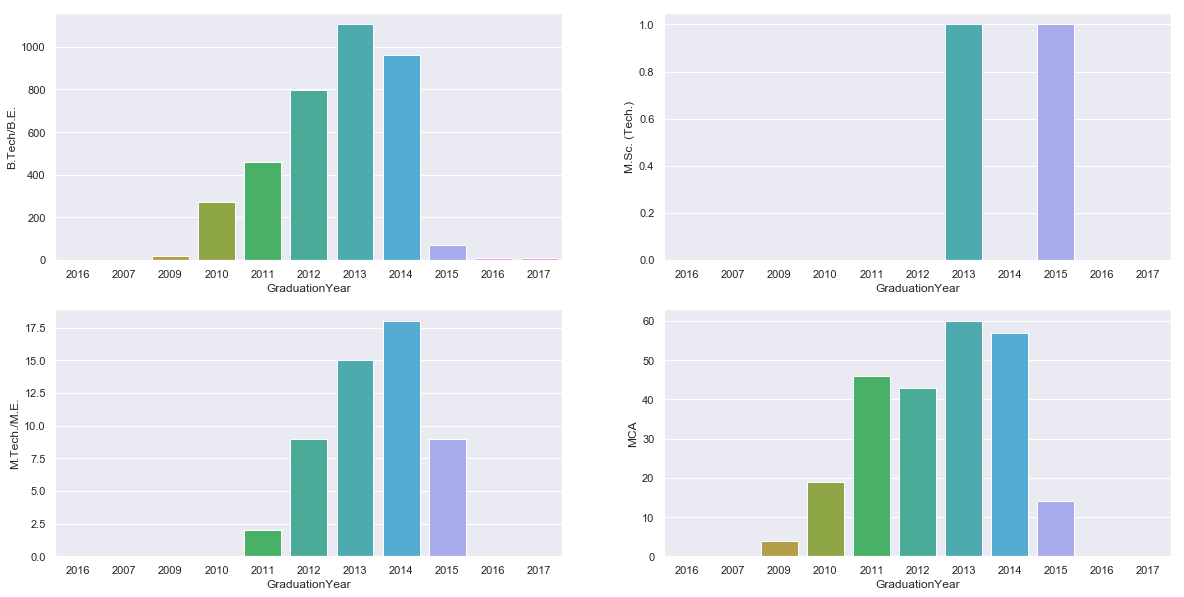

In [728]:
fig,axes=plt.subplots(2,2,figsize=(20,10))
sns.barplot(x=table1.index,y=table1['B.Tech/B.E.'],ax=axes[0,0])
sns.barplot(x=table1.index,y=table1['M.Sc. (Tech.)'],ax=axes[0,1])
sns.barplot(x=table1.index,y=table1['M.Tech./M.E.'],ax=axes[1,0])
sns.barplot(x=table1.index,y=table1['MCA'],ax=axes[1,1])

In [729]:
table1.sum(1).astype('float')

GraduationYear
2016       1.0
2007       1.0
2009      24.0
2010     292.0
2011     507.0
2012     847.0
2013    1181.0
2014    1036.0
2015      94.0
2016       7.0
2017       8.0
dtype: float64

# Eda on categorical versus continuous

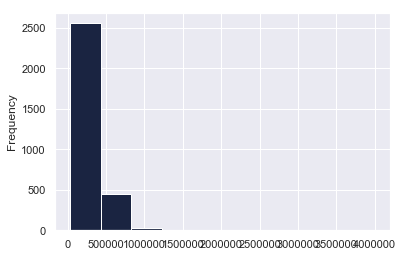

In [730]:
train[train.Gender=='m'].Salary.plot(kind='hist')

## Performing ChiSquare Test The Categorical Variable

In [794]:
cat_train.head()

,DOL,Designation,JobCity,Gender,10board,12board,CollegeTier,Degree,Specialization,CollegeCityTier,CollegeState,Stream,age_bin
0,present,engineer,Bangalore,f,others,others,2,B.Tech/B.E.,computer engineering,0,south_indian_states,CP,bin 2
1,present,manager,other states,m,cbse,cbse,2,B.Tech/B.E.,electronics and communication engineering,0,central_india,EAS,bin 2
2,present,engineer,Chennai,f,cbse,cbse,2,B.Tech/B.E.,information technology,0,north_indian_states,CP,bin 1
3,present,engineer,Gurgaon,m,cbse,cbse,1,B.Tech/B.E.,computer engineering,1,north_indian_states,CP,bin 2
4,left,others,other states,m,cbse,cbse,2,B.Tech/B.E.,electronics and communication engineering,0,north_indian_states,EAS,bin 2


In [732]:
a=pd.crosstab(cat_train.GraduationYear,cat_train.Degree)

AttributeError: 'DataFrame' object has no attribute 'GraduationYear'

In [782]:
cat_train.columns

Index(['DOL', 'Designation', 'JobCity', 'Gender', '10board', '12board',
       'CollegeTier', 'Degree', 'Specialization', 'CollegeCityTier',
       'CollegeState', 'Stream'],
      dtype='object')

In [ ]:
# dellocate this varible from memory before running the next cell
del b,c,d,e,f,chi_table

In [ ]:
# for creating a chi table and finding the infernce
import scipy.stats as stats
b=[]
c=[]
d=[]
e=[]
f=[]
for i in cat_train.columns:
    for j in cat_train.columns:
        a=pd.crosstab(cat_train[i],cat_train[j])
        chi_sq_Stat, p_value, deg_freedom, exp_freq=stats.chi2_contingency(a)
        if p_value<0.05:
            b.append(i)
            c.append(j)
            d.append(chi_sq_Stat)
            e.append(p_value)
            f.append('dependent')
        else:
            b.append(i)
            c.append(j)
            d.append(chi_sq_Stat)
            e.append(p_value)
            f.append('independent')
            
                
chi_table=pd.DataFrame({'feature 1':b,
             'feature 2':c,
             'chi stat':d,
             'p_value':e,
             'result':f})

In [ ]:
# chi table
chi_table[chi_table.result=='dependent'].head()

In [ ]:
sns.distplot(train.Salary)

In [733]:
minus_columns.head()

NameError: name 'minus_columns' is not defined

In [734]:
# need to be worked on tym being
'''a_=[]
b_=[]
c_=[]
d_=[]
e_=[]
f_=[]
g_=[]
for i in minus_columns.ComputerProgramming:
    if i == -1:
        a_.append(-1)
    else:
        a_.append(1)
for i in minus_columns.ElectronicsAndSemicon:
    if i == -1:
        b_.append(-1)
    else:
        b_.append(1)
for i in minus_columns.ComputerScience:
    if i == -1:
        c_.append(-1)
    else:
        c_.append(1)
for i in minus_columns.MechanicalEngg:
    if i == -1:
        d_.append(-1)
    else:
        d_.append(1)
for i in minus_columns.ElectricalEngg:
    if i == -1:
        e_.append(-1)
    else:
        e_.append(1)
for i in minus_columns.TelecomEngg:
    if i == -1:
        f_.append(-1)
    else:
        f_.append(1)
for i in minus_columns.CivilEngg:
    if i == -1:
        g_.append(-1)
    else:
        g_.append(1)'''
        
        
        
        
        
        
        

'a_=[]\nb_=[]\nc_=[]\nd_=[]\ne_=[]\nf_=[]\ng_=[]\nfor i in minus_columns.ComputerProgramming:\n    if i == -1:\n        a_.append(-1)\n    else:\n        a_.append(1)\nfor i in minus_columns.ElectronicsAndSemicon:\n    if i == -1:\n        b_.append(-1)\n    else:\n        b_.append(1)\nfor i in minus_columns.ComputerScience:\n    if i == -1:\n        c_.append(-1)\n    else:\n        c_.append(1)\nfor i in minus_columns.MechanicalEngg:\n    if i == -1:\n        d_.append(-1)\n    else:\n        d_.append(1)\nfor i in minus_columns.ElectricalEngg:\n    if i == -1:\n        e_.append(-1)\n    else:\n        e_.append(1)\nfor i in minus_columns.TelecomEngg:\n    if i == -1:\n        f_.append(-1)\n    else:\n        f_.append(1)\nfor i in minus_columns.CivilEngg:\n    if i == -1:\n        g_.append(-1)\n    else:\n        g_.append(1)'

# applying Random Forest on whole data set:

In [735]:
train.Degree.value_counts()

B.Tech/B.E.      3700
MCA               243
M.Tech./M.E.       53
M.Sc. (Tech.)       2
Name: Degree, dtype: int64

In [736]:
train.head().T

,0,1,2,3,4
Salary,420000,500000,325000,1100000,200000
DOL,present,present,present,present,left
Designation,engineer,manager,engineer,engineer,others
JobCity,Bangalore,Indore,Chennai,Gurgaon,Manesar
Gender,f,m,f,m,m
10percentage,84.3,85.4,85,85.6,78
10board,"board ofsecondary education,ap",cbse,cbse,cbse,cbse
12graduation,2007,2007,2010,2007,2008
12percentage,95.8,85,68.2,83.6,76.8
12board,others,cbse,cbse,cbse,cbse


In [737]:
new_train=train

In [934]:
cat_train.head()

,DOL,Designation,JobCity,Gender,10board,12board,CollegeTier,Degree,Specialization,CollegeCityTier,CollegeState,Stream,age_bin
0,present,engineer,Bangalore,f,others,others,2,B.Tech/B.E.,computer engineering,0,south_indian_states,CP,bin 2
1,present,manager,other states,m,cbse,cbse,2,B.Tech/B.E.,electronics and communication engineering,0,central_india,EAS,bin 2
2,present,engineer,Chennai,f,cbse,cbse,2,B.Tech/B.E.,information technology,0,north_indian_states,CP,bin 1
3,present,engineer,Gurgaon,m,cbse,cbse,1,B.Tech/B.E.,computer engineering,1,north_indian_states,CP,bin 2
4,left,others,other states,m,cbse,cbse,2,B.Tech/B.E.,electronics and communication engineering,0,north_indian_states,EAS,bin 2


In [906]:
new_train['age_bin']=cat_train.age_bin

In [922]:
new_train['College123']=cat_train['CollegeState']

In [935]:
new_train['desig']=cat_train['Designation']

In [936]:
# making dummie for new train
dummy=pd.get_dummies(new_train)

In [937]:
dummy.shape

(3998, 770)

In [938]:
# scaling the dummy
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()


In [939]:
scaled_dummy=pd.DataFrame(sc.fit_transform(dummy.drop('Salary',axis=1)),columns=dummy.drop('Salary',axis=1).columns)
y=train.Salary

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [940]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(scaled_dummy,y,test_size=0.30,random_state=123)

In [947]:
# fitting in radom Forest
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=9,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=True, random_state=None, verbose=0, warm_start=False)

In [948]:
rf

RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=9,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=True, random_state=None, verbose=0, warm_start=False)

In [949]:
rf_pred=rf.fit(x_train,y_train).predict(x_test)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


In [950]:
from sklearn.metrics import mean_squared_error as MSE

In [951]:
np.sqrt(MSE(rf_pred,y_test))

217963.32308058927

In [952]:
np.sqrt(MSE(rf.fit(x_train,y_train).predict(x_train),y_train))

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


138109.06231733822

### The base RMSE score of the Random Forest model is  228018.1804053779

In [752]:
# paramter tuning the model

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
parmeter={'max_depth':[1,2,3,4,5,6,7,8,9,10]}

In [ ]:
gd=GridSearchCV(rf,parmeter)

In [ ]:
gd.fit(np.array(x_train),y_train)

In [ ]:
gd.best_params_

In [ ]:
gd.best_estimator_

In [ ]:
gd.best_score_

In [ ]:
gd.cv_results_

# concatin pca dataframe and cat variable

In [795]:
pc_dataframe.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11
0,-1.680147,0.291766,-0.575038,-1.542980,0.375436,0.410873,0.155912,0.249876,0.204422,-1.020973,-1.429161
1,-2.684423,0.532021,2.055348,-0.738609,1.117403,0.048655,0.596914,0.847520,-0.716495,-0.025408,0.663718
2,-1.241424,-1.323952,-0.205570,0.720762,0.604512,-0.549106,0.011328,-1.567987,-0.290671,0.833283,-0.401071
3,-1.662397,1.382038,1.122949,-0.038322,-0.357275,0.284256,0.634457,-0.251801,-0.304870,-0.571107,-0.356501
4,-0.055974,1.304224,-0.053800,0.477094,0.799655,0.458205,-0.765255,-0.601323,0.424582,0.923944,-0.726561


In [796]:
cat_train.head()

,DOL,Designation,JobCity,Gender,10board,12board,CollegeTier,Degree,Specialization,CollegeCityTier,CollegeState,Stream,age_bin
0,present,engineer,Bangalore,f,others,others,2,B.Tech/B.E.,computer engineering,0,south_indian_states,CP,bin 2
1,present,manager,other states,m,cbse,cbse,2,B.Tech/B.E.,electronics and communication engineering,0,central_india,EAS,bin 2
2,present,engineer,Chennai,f,cbse,cbse,2,B.Tech/B.E.,information technology,0,north_indian_states,CP,bin 1
3,present,engineer,Gurgaon,m,cbse,cbse,1,B.Tech/B.E.,computer engineering,1,north_indian_states,CP,bin 2
4,left,others,other states,m,cbse,cbse,2,B.Tech/B.E.,electronics and communication engineering,0,north_indian_states,EAS,bin 2


In [797]:
concatinated_df=pd.concat([pc_dataframe,cat_train],axis=1)

In [798]:
new_dummy=pd.get_dummies(concatinated_df)

In [799]:
new_dummy.shape

(3998, 72)

# model buliding state

In [800]:

# scaling target columns
scaled_new_dummy=pd.DataFrame(sc.fit_transform(new_dummy),columns=new_dummy.columns)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [1017]:
from sklearn.model_selection import train_test_split
xtr,xte,ytr,yte=train_test_split(scaled_new_dummy,(train.Salary),test_size=0.30,random_state=123)

In [1018]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()


print('testing accuracy in linear regression  {}'.format(np.sqrt(MSE(lr.fit(xtr,(ytr)).predict(xte),yte))))
print('training accuracy in linear regression  {}'.format(np.sqrt(MSE(lr.fit(xtr,(ytr)).predict(xtr),ytr))))


testing accuracy in linear regression  211407.21951936654
training accuracy in linear regression  181049.18282641677


In [1008]:
testing=lr.fit(xtr,np.log10(ytr)).predict(xte)
training=lr.fit(xtr,np.log10(ytr)).predict(xtr)

In [1021]:
print(np.sqrt(MSE(10**testing,yte)))
print(np.sqrt(MSE(10**training,ytr)))

212701.47695607436
183569.58693933854


In [990]:
from sklearn.tree import DecisionTreeRegressor
dc=DecisionTreeRegressor(criterion='mse',  max_features=None,
           max_leaf_nodes=600, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=30,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best',max_depth=10)
dc

print('testing accuracy in randomforest  {}'.format(np.sqrt(MSE(dc.fit(xtr,ytr).predict(xte),yte))))
print('training accuracy in randomforest  {}'.format(np.sqrt(MSE(dc.fit(xtr,ytr).predict(xtr),ytr))))
''''from sklearn.ensemble import AdaBoostRegressor
ada=AdaBoostRegressor(base_estimator=dc, learning_rate=1, loss='linear',
         n_estimators=50, random_state=None)
print('testing accuracy in adaptive boosting  {}'.format(np.sqrt(MSE(ada.fit(xtr,ytr).predict(xte),yte))))
print('training accuracy in adaptive boosting  {}'.format(np.sqrt(MSE(ada.fit(xtr,ytr).predict(xtr),ytr))))'''
from sklearn.ensemble import AdaBoostRegressor
ada=AdaBoostRegressor(base_estimator=dc, learning_rate=0.5, loss='exponential',
         n_estimators=500, random_state=None)

ada

print('testing accuracy in adaptive boosting  {}'.format(np.sqrt(MSE(ada.fit(xtr,ytr).predict(xte),yte))))
print('training accuracy in adaptive boosting  {}'.format(np.sqrt(MSE(ada.fit(xtr,ytr).predict(xtr),ytr))))
abc=ada.fit(xtr,ytr).predict(xte)

testing accuracy in randomforest  0.49100082628539166
training accuracy in randomforest  0.4284529218747105
testing accuracy in adaptive boosting  0.45893440459086304
training accuracy in adaptive boosting  0.3220393511814064


In [991]:
def stacking(xtr,ytr,xte):
    
    b=dc.fit(xtr,ytr).predict(xte)
   
    d=ada.fit(xtr,ytr).predict(xte)
    return (b+d)/2
    

In [992]:
np.sqrt(MSE(stacking(xtr,ytr,xte),yte))

0.46018962346200026

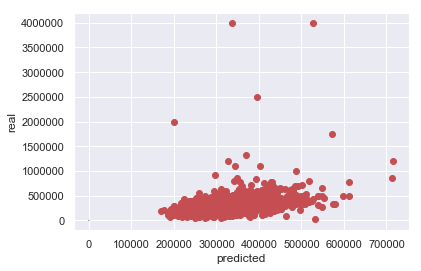

<module 'matplotlib.pyplot' from '/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

In [883]:
def plot_real_vs_predicted(y_pred,y_test):
    plt.plot(y_pred,y_test,'ro')
    plt.plot([0,50],[0,50], 'g-')
    plt.xlabel('predicted')
    plt.ylabel('real')
    plt.show()
    return plt
plot_real_vs_predicted(abc,yte)

In [879]:
from sklearn.linear_model import ridge_regression
rr=ridge_regression()


TypeError: ridge_regression() missing 3 required positional arguments: 'X', 'y', and 'alpha'

In [865]:
# grid search on decision trees
from sklearn.model_selection import GridSearchCV
gd=GridSearchCV(param_grid=parameters,estimator=dc)
gd.fit(xtr,ytr)

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=9, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [10, 20, 30], 'max_leaf_nodes': [10, 20, 30], 'min_samples_leaf': [10, 20, 30]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [866]:
gd.best_params_

{'max_depth': 10, 'max_leaf_nodes': 20, 'min_samples_leaf': 30}

In [864]:
parameters = {'max_depth': [10,20,30],
             'max_leaf_nodes':[10,20,30],
             'min_samples_leaf':[10,20,30]}

In [993]:
from sklearn.ensemble import RandomForestRegressor
rf_tree=RandomForestRegressor(bootstrap=True, criterion='mse',
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

ef_tree

np.sqrt(MSE(rf_tree.fit(xtr,ytr).predict(xte),yte))

print('testing accuracy in randomforest  {}'.format(np.sqrt(MSE(ef_tree.fit(xtr,ytr).predict(xte),yte))))
print('training accuracy in randomforest  {}'.format(np.sqrt(MSE(rf_tree.fit(xtr,ytr).predict(xtr),ytr))))

testing accuracy in randomforest  0.4770556771937558
training accuracy in randomforest  0.20716906552711184


In [1001]:
from sklearn.ensemble import AdaBoostRegressor
ada=AdaBoostRegressor(base_estimator=ef_tree, learning_rate=1, loss='linear',
         n_estimators=50, random_state=None)

ada

print('testing accuracy in adaptive boosting  {}'.format(np.sqrt(MSE(ada.fit(xtr,ytr).predict(xte),yte))))
print('training accuracy in adaptive boosting  {}'.format(np.sqrt(MSE(ada.fit(xtr,ytr).predict(xtr),ytr))))

testing accuracy in adaptive boosting  0.4455910766066034
training accuracy in adaptive boosting  0.11668478846571809


In [995]:
# xgboost
from xgboost import XGBRegressor
xg=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.6, max_delta_step=0,
       max_depth=8, min_child_weight=1, missing=None, n_estimators=600,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

print(np.sqrt(MSE(xg.fit(xtr,ytr).predict(xtr),ytr)))
print(np.sqrt(MSE(xg.fit(xtr,ytr).predict(xte),yte)))


0.0008274412941288956
0.5420505771320973


In [816]:
xg

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [ ]:
# using xgbboost in ada boost
from sklearn.ensemble import AdaBoostRegressor
ada=AdaBoostRegressor(base_estimator=xg, learning_rate=1, loss='linear',
         n_estimators=50, random_state=None)
print('testing accuracy in adaptive boosting  {}'.format(np.sqrt(MSE(ada.fit(xtr,ytr).predict(xte),yte))))
print('training accuracy in adaptive boosting  {}'.format(np.sqrt(MSE(ada.fit(xtr,ytr).predict(xtr),ytr))))

In [ ]:
from sklearn.neural_network import MLPRegressor
mlp=MLPRegressor(activation='identity', alpha=0.01, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(1000,), learning_rate='adaptive',
       learning_rate_init=2.0, max_iter=200, momentum=0.3,
       n_iter_no_change=20, nesterovs_momentum=True, power_t=0.3,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

mlp

print('test_Accurracy',np.sqrt(MSE(mlp.fit(xtr,ytr).predict(xte),yte)))
print('train_Accuracy',np.sqrt(MSE(mlp.fit(xtr,ytr).predict(xtr),ytr)))

In [984]:
from sklearn.linear_model import ElasticNetCV
el=ElasticNetCV(eps=0.003,tol=0.08)

In [985]:
print('testing accuracy in adaptive boosting  {}'.format(np.sqrt(MSE(el.fit(xtr,ytr).predict(xte),yte))))
print('training accuracy in adaptive boosting  {}'.format(np.sqrt(MSE(el.fit(xtr,ytr).predict(xtr),ytr))))

testing accuracy in adaptive boosting  229969.6223715146
training accuracy in adaptive boosting  203912.7414833715


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [955]:
el

ElasticNetCV(alphas=None, copy_X=True, cv='warn', eps=0.001,
       fit_intercept=True, l1_ratio=0.5, max_iter=1000, n_alphas=100,
       n_jobs=None, normalize=False, positive=False, precompute='auto',
       random_state=None, selection='cyclic', tol=0.0001, verbose=0)

In [ ]:
parameters={'alphas':[0.5,0.6]
           }

# new concatinatted data


In [ ]:
concat_data_after_pca=pd.read_csv("/Users/MCHARU/Desktop/capstone project/concat_data_after_pca.csv",index_col=0)

In [ ]:
concat_data_after_pca.head().T

In [ ]:
len(concat_data_after_pca.columns) 

In [ ]:
def states(x):
    if x in ['Kerala','Tamil Nadu','Karnataka','Andhra Pradesh','Telangana']:
        return 'south_indian_states'
    elif x in ['Himachal Pradesh','Uttarakhand','Jammu and Kashmir','Delhi','Uttar Pradesh','Haryana','Punjab','Uttarakhand']:
        return'north_indian_states'
    elif x in ['Goa','Rajasthan','Maharashtra','Gujarat']:
        return 'west_indian_states'
    elif x in ['Jharkhand','Bihar','West Bengal','Orissa']:
        return 'east_indian states'
    elif x in ['Madhya Pradesh','Chhattisgarh']:
        return 'central_india'
    elif x in['Assam','Sikkim','Meghalaya']:
        return 'north_est_india'
    else:
        return 'union_territory'
concat_data_after_pca['CollegeState']=train['CollegeState']
concat_data_after_pca['CollegeState']=concat_data_after_pca["CollegeState"].apply(states)

In [ ]:
dummy_concatinated=pd.get_dummies(concat_data_after_pca)

In [ ]:
scaled_concatinated=pd.DataFrame(sc.fit_transform(dummy_concatinated),columns=dummy_concatinated.columns)

In [ ]:
from sklearn.model_selection import train_test_split
xtr,xte,ytr,yte=train_test_split(scaled_concatinated,train.Salary,test_size=0.30,random_state=123)

In [1003]:
from sklearn.tree import DecisionTreeRegressor
dc=DecisionTreeRegressor(criterion='mse',  max_features=5,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')
dc

print('testing accuracy in randomforest  {}'.format(np.sqrt(MSE(dc.fit(xtr,ytr).predict(xte),yte))))
print('training accuracy in randomforest  {}'.format(np.sqrt(MSE(dc.fit(xtr,ytr).predict(xtr),ytr))))
''''from sklearn.ensemble import AdaBoostRegressor
ada=AdaBoostRegressor(base_estimator=dc, learning_rate=1, loss='linear',
         n_estimators=50, random_state=None)
print('testing accuracy in adaptive boosting  {}'.format(np.sqrt(MSE(ada.fit(xtr,ytr).predict(xte),yte))))
print('training accuracy in adaptive boosting  {}'.format(np.sqrt(MSE(ada.fit(xtr,ytr).predict(xtr),ytr))))'''

testing accuracy in randomforest  0.6837680203356248
training accuracy in randomforest  1.0074595362718212e-16


"'from sklearn.ensemble import AdaBoostRegressor\nada=AdaBoostRegressor(base_estimator=dc, learning_rate=1, loss='linear',\n         n_estimators=50, random_state=None)\nprint('testing accuracy in adaptive boosting  {}'.format(np.sqrt(MSE(ada.fit(xtr,ytr).predict(xte),yte))))\nprint('training accuracy in adaptive boosting  {}'.format(np.sqrt(MSE(ada.fit(xtr,ytr).predict(xtr),ytr))))"

In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()


print('testing accuracy in linear regression  {}'.format(np.sqrt(MSE(lr.fit(xtr,ytr).predict(xte),yte))))
print('training accuracy in linear regression  {}'.format(np.sqrt(MSE(lr.fit(xtr,ytr).predict(xtr),ytr))))

In [ ]:
from sklearn.ensemble import RandomForestRegressor
ef_tree=RandomForestRegressor(bootstrap=True, criterion='mse',
           max_features=10, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=4,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

ef_tree

np.sqrt(MSE(ef_tree.fit(xtr,ytr).predict(xte),yte))

print('testing accuracy in randomforest  {}'.format(np.sqrt(MSE(ef_tree.fit(xtr,ytr).predict(xte),yte))))
print('training accuracy in randomforest  {}'.format(np.sqrt(MSE(ef_tree.fit(xtr,ytr).predict(xtr),ytr))))

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
ada=AdaBoostRegressor(base_estimator=ef_tree, learning_rate=0.9, loss='linear',
         n_estimators=100, random_state=None)

ada

print('testing accuracy in adaptive boosting  {}'.format(np.sqrt(MSE(ada.fit(xtr,ytr).predict(xte),yte))))
print('training accuracy in adaptive boosting  {}'.format(np.sqrt(MSE(ada.fit(xtr,ytr).predict(xtr),ytr))))

In [ ]:
# xgboost
from xgboost import XGBRegressor
xg=XGBRegressor()

print('testing accuracy in XG boosting  {}'.format(np.sqrt(MSE(xg.fit(xtr,ytr).predict(xte),yte))))
print('training accuracy in XG boosting  {}'.format(np.sqrt(MSE(xg.fit(xtr,ytr).predict(xtr),ytr))))

In [ ]:
from sklearn.neural_network import MLPRegressor
mlp=MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(500,500), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)


print('test_Accurracy',np.sqrt(MSE(mlp.fit(xtr,ytr).predict(xte),yte)))
print('train_Accuracy',np.sqrt(MSE(mlp.fit(xtr,ytr).predict(xtr),ytr)))

In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression(normalize=True,fit_intercept=True)
from sklearn.model_selection import train_test_split
xtr,xte,ytr,yte=train_test_split(pc_dataframe,train.Salary,test_size=0.30,random_state=123)

print('testing accuracy in linear regression  {}'.format(np.sqrt(MSE(lr.fit(xtr,ytr).predict(xte),yte))))
print('training accuracy in linear regression  {}'.format(np.sqrt(MSE(lr.fit(xtr,ytr).predict(xtr),ytr))))

# Now working on test data for predictions

In [498]:
train=pd.read_excel('train.xlsx')

test=pd.read_excel('test.xlsx')

In [499]:
train.head()

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
train,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
train,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,cbse,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
train,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,cbse,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
train,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
train,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,cbse,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [500]:
test.head()

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
test,664736,?,?,?,?,?,m,1992-01-16,75.0,cbse,...,-1,-1,-1,-1,-1,0.2718,-0.2871,0.4711,-0.7415,-0.4776
test,1123290,?,?,?,?,?,m,1992-06-05,83.0,state board,...,253,-1,-1,-1,-1,0.7027,0.2124,1.2396,-0.8682,1.0554
test,1062444,?,?,?,?,?,f,1992-11-22,85.2,cbse,...,-1,-1,-1,-1,-1,0.1282,1.0449,-0.6048,-1.6289,-0.8608
test,1072028,?,?,?,?,?,f,1990-10-17,81.8,state board,...,469,-1,-1,-1,-1,0.4155,1.0449,-0.6048,1.5404,1.0554
test,267259,?,?,?,?,?,m,1990-03-20,78.0,cbse,...,-1,-1,-1,-1,-1,0.0464,0.0328,-0.0537,0.0623,0.6603


In [501]:
# drop id column from train and test
train.drop('ID',axis=1,inplace=True)
test.drop('ID',axis=1,inplace=True)


train.index=np.arange(0,len(train))
test.index=np.arange(0,len(test))

In [502]:
target= train.Salary

In [503]:
final_train=train.drop(['Salary','DOL','DOJ',"Designation",'JobCity'],axis=1)
final_test=test.drop(['Salary','DOL','DOJ',"Designation",'JobCity'],axis=1)

In [504]:
zippped_columns=zip(final_train.ComputerProgramming,final_train.ElectronicsAndSemicon,final_train.ComputerScience,final_train.MechanicalEngg,final_train.ElectricalEngg,final_train.TelecomEngg,final_train.CivilEngg)
new_column=[]

for i,j,k,l,m,n,o in zippped_columns:
    test1=[]
    li=[i,j,k,l,m,n,o]
    
    if li[0]!=-1:
        test1.append('CP')
    elif li[1]!=-1:
        test1.append('EAS')
    elif li[2]!=-1:
        test1.append('CS')
    elif li[3]!=-1:
        test1.append('ME')
    elif li[4]!=-1:
        test1.append('EE')
    elif li[5]!=-1:
        test1.append('TE')
    elif li[6]!=-1:
        test1.append('CE')
    else:
        test1.append('null')

    new_column.append(test1)
    

# for removing tranforming from list to str format
b=[]
for i in range(0,len(new_column)):
    b.append(new_column[i][0])

    
final_train["Stream"]=b

In [505]:
zippped_columns=zip(final_test.ComputerProgramming,final_test.ElectronicsAndSemicon,final_test.ComputerScience,final_test.MechanicalEngg,final_test.ElectricalEngg,final_test.TelecomEngg,final_test.CivilEngg)
new_column=[]

for i,j,k,l,m,n,o in zippped_columns:
    test1=[]
    li=[i,j,k,l,m,n,o]
    
    if li[0]!=-1:
        test1.append('CP')
    elif li[1]!=-1:
        test1.append('EAS')
    elif li[2]!=-1:
        test1.append('CS')
    elif li[3]!=-1:
        test1.append('ME')
    elif li[4]!=-1:
        test1.append('EE')
    elif li[5]!=-1:
        test1.append('TE')
    elif li[6]!=-1:
        test1.append('CE')
    else:
        test1.append('null')

    new_column.append(test1)
    

# for removing tranforming from list to str format
b=[]
for i in range(0,len(new_column)):
    b.append(new_column[i][0])

    
final_test["Stream"]=b

In [506]:
#after extrating the feature droping the columns
final_train.drop(['ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg'],axis=1,inplace=True)

In [507]:
final_test.drop(['ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg'],axis=1,inplace=True)

In [508]:
# transfoming 12 board
def impute(x):
    if x=='cbse':
        return 'cbse'
    elif x=='state board':
        return 'state board'
    else:
        return 'others'
final_train['12board']=final_train['12board'].apply(impute)

In [509]:
def impute(x):
    if x=='cbse':
        return 'cbse'
    elif x=='state board':
        return 'state board'
    else:
        return 'others'
final_test['12board']=final_test['12board'].apply(impute)

In [528]:
final_train['10board']=final_train['10board'].apply(impute)
final_test['10board']=final_test['10board'].apply(impute)

In [ ]:
from datetime import datetime
# using list comprehension
final_train['Age']=[ abs(2016-final_train.DOB[i].year) for i in range(0,len(final_train))]

final_train=final_train.drop('DOB',axis=1)

In [516]:
from datetime import datetime
# using list comprehension
final_test['Age']=[ abs(2016-final_test.DOB[i].year) for i in range(0,len(final_test))]

final_test=final_test.drop('DOB',axis=1)

In [560]:
final_test.drop(['CollegeID',"CollegeCityID"],axis=1,inplace=True)
final_train.drop(['CollegeID',"CollegeCityID"],axis=1,inplace=True)

In [586]:
cat_train.Specialization.value_counts()
def impute(x):
    if x=='electronics and communication engineering':
        return 'electronics and communication engineering'
    elif x=='computer science & engineering':
        return 'computer science & engineering'
    elif x=='information technology':
        return 'information technology'
    elif x=='computer engineering':
        return 'computer engineering'
    elif x=='computer application':
        return 'computer application'
    elif x=='mechanical engineering':
        return 'mechanical engineering'
    elif x=='electronics and electrical engineering':
        return 'electronics and electrical engineering'
    elif x=='electronics & telecommunications':
        return 'electronics & telecommunications'
    elif x=='electronics & telecommunications':
        return 'electronics & telecommunications'
    elif x=='electrical engineering':
        return 'electrical engineering'
    else:
        return 'other qalifications'
final_test['Specialization']=final_test.Specialization.apply(impute)
final_train['Specialization']=final_train.Specialization.apply(impute)

In [589]:
len(final_test.Specialization.value_counts())

10

In [590]:
len(final_train.Specialization.value_counts())

10

In [609]:
def states(x):
    if x in ['Kerala','Tamil Nadu','Karnataka','Andhra Pradesh','Telangana']:
        return 'south_indian_states'
    elif x in ['Himachal Pradesh','Uttarakhand','Jammu and Kashmir','Delhi','Uttar Pradesh','Haryana','Punjab','Uttarakhand']:
        return'north_indian_states'
    elif x in ['Goa','Rajasthan','Maharashtra','Gujarat']:
        return 'west_indian_states'
    elif x in ['Jharkhand','Bihar','West Bengal','Orissa']:
        return 'east_indian states'
    elif x in ['Madhya Pradesh','Chhattisgarh']:
        return 'central_india'
    elif x in['Assam','Sikkim','Meghalaya']:
        return 'north_est_india'
    else:
        return 'union_territory'

final_test['CollegeState']=final_test["CollegeState"].apply(states)
final_train['CollegeState']=final_train["CollegeState"].apply(states)

In [612]:
len(final_train.CollegeState.value_counts())

7

In [614]:
len(final_test.CollegeState.value_counts())

7

In [615]:
final_train['10board'].value_counts()

others         1439
cbse           1395
state board    1164
Name: 10board, dtype: int64

In [616]:
dumm_train=pd.get_dummies(final_train)
dumm_test=pd.get_dummies(final_test)

In [617]:
print(dumm_train.shape)
print(dumm_test.shape)


(3998, 54)
(1500, 54)


In [767]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaled_train1= pd.DataFrame(sc.fit_transform(dumm_train),columns=dumm_train.columns)
scaled_test1=pd.DataFrame(sc.fit_transform(dumm_test),columns=dumm_test.columns)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [1000]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
print(np.sqrt(MSE(lr.fit(scaled_train1,np.log10(target)).predict(scaled_train1),target)))
lr_pred=lr.fit(scaled_train1,np.log10(target)).predict(scaled_test1)

374061.17694838037


In [761]:
from sklearn.ensemble import RandomForestRegressor
ef_tree=RandomForestRegressor()
rf_pred=ef_tree.fit(dumm_train,target).predict(dumm_test)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [1002]:
x=np.log10(train.Sala

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf=RandomForestRegressor()
rf.fit(xtr,)

In [987]:
# APPLYIN BOXCOX TRNFORAMTION
from scipy.stats import boxcox
abc_,lamb=boxcox(xtr)

ValueError: Data must be positive.

In [762]:
result=pd.read_excel('results.xlsx')
pd.DataFrame({'ID':result.ID,
            "Salary":rf_pred}).to_excel('results.xlsx',index=False)